In [73]:
from src.beach.model import Beach
import matplotlib.pyplot as pl
import pandas as pd
import random

# Analysis of the of the Warehouse Multiagent System

So far we have run our agent model only once until it completes and we have looked the individual agent behaviour. Now, we will analyse the behaviour of the warehouse and the agents at as whole.


First we need to define the parameters of our model and simulation. Note we also define something call `seed` which is a parameter required to generate pseudo-random numbers. If you are not familiar with `seeds` please read [this short blog](https://yourbasic.org/algorithms/random-number-generator-seed/) about it.

In [74]:
n_steps = 750
#seed = 123 
seed = random.randint(0,1000)

In [75]:
m = Beach(n_CT_robots=3, n_LC_robots=5, n_obstacles=50, n_Ldebris=20, n_debris=200, width=50, height=50, EXTENDED=True, NOVEL=True)

In [76]:
for i in range(n_steps):
    m.step()

CT 54 state is: 0
CT 54 position is:  1 , 40
CT 54 payload is: 0
Payload contains []
CT 54 charge is: 621
Distance to charging station is: 41
Must return False
Large Debris left 20
Debris left 200
Robot is now exploring
CT 55 state is: 0
CT 55 position is:  1 , 23
CT 55 payload is: 0
Payload contains []
CT 55 charge is: 408
Distance to charging station is: 24
Must return False
Large Debris left 20
Debris left 200
Robot is now exploring
Bidder Step
CT 53 state is: 0
CT 53 position is:  1 , 46
CT 53 payload is: 0
Payload contains []
CT 53 charge is: 472
Distance to charging station is: 47
Must return False
Large Debris left 20
Debris left 200
Robot is now exploring
CT 54 state is: 1
CT 54 position is:  1 , 40
CT 54 payload is: 0
Payload contains []
CT 54 charge is: 621
Distance to charging station is: 41
Must return False
Large Debris left 20
Debris left 197
Exploring around cell 49 9
CT 55 state is: 1
CT 55 position is:  1 , 23
CT 55 payload is: 0
Payload contains []
CT 55 charge is: 40

In [77]:
m_df = m.datacollector.get_model_vars_dataframe()
ag_df = m.datacollector.get_agent_vars_dataframe()

## Cleanness of beach over time

All large debris finished at timestep 338
All small debris finished at timestep 387


Text(0.5, 1.0, 'Cleanliness of beach over time')

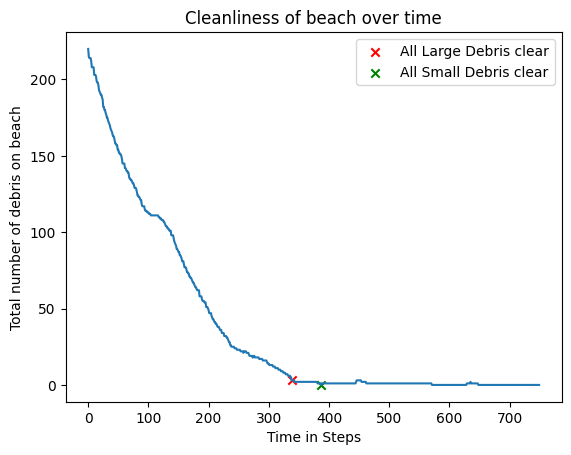

In [78]:
data = m_df.pending_LDebris + m_df.pending_Debris
pl.plot(data)

# Plot timestep where all Large debris are cleared
try:
    LDebris_Finish = m_df.index[m_df.pending_LDebris==0][0]
    print("All large debris finished at timestep", LDebris_Finish)
    pl.scatter(x = LDebris_Finish, y=data[LDebris_Finish], color='r', marker="x", label= "All Large Debris clear")
except:
    print("Large Debris not cleared")
    
# Plot timestep where all debris are cleared
try:
    Debris_Finish = m_df.index[m_df.pending_Debris==0][0]
    print("All small debris finished at timestep", Debris_Finish)
    pl.scatter(x = Debris_Finish, y=data[Debris_Finish], color='g', marker="x", label= "All Small Debris clear")
except:
    print("Small Debris not cleared")

pl.legend()
pl.xlabel("Time in Steps")
pl.ylabel("Total number of debris on beach")
pl.title("Cleanliness of beach over time")

## Agent Busyness over time
This metric shows us how efficient the agents are at searching the beach for work.

We want to minimise time exploring as that is time that could spent clearing the beach of debris.

This plot is also helpful in visualising the importance of the job creation system implemented in Activity 1 as we can compare time wasted exploring before and after implementation.

All large debris finished at timestep 338
All small debris finished at timestep 387


Text(0.5, 1.0, 'Time spent exploring over time')

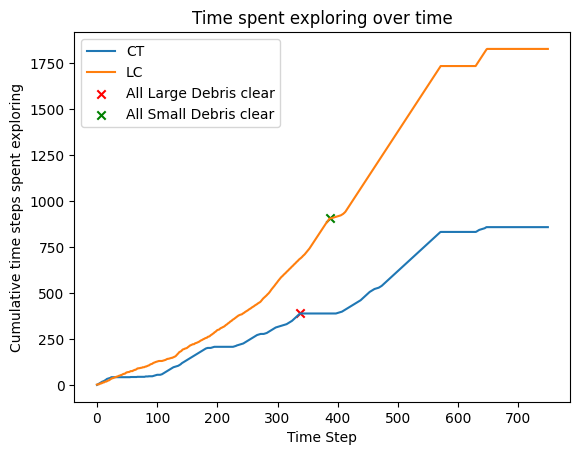

In [79]:
CT_exploring = m_df.exploring_CT.cumsum()
LC_exploring = m_df.exploring_LC.cumsum()

pl.plot(CT_exploring, label="CT")
pl.plot(LC_exploring, label="LC")

# Plot timestep where all Large debris are cleared
try:
    LDebris_Finish = m_df.index[m_df.pending_LDebris==0][0]
    print("All large debris finished at timestep", LDebris_Finish)
    pl.scatter(x = LDebris_Finish, y=CT_exploring[LDebris_Finish], color='r', marker="x", label= "All Large Debris clear")
except:
    print("Large Debris not cleared")

# Plot timestep where all debris are cleared
try:
    Debris_Finish = m_df.index[m_df.pending_Debris==0][0]
    print("All small debris finished at timestep", Debris_Finish)
    pl.scatter(x = Debris_Finish, y=LC_exploring[Debris_Finish], color='g', marker="x", label= "All Small Debris clear")
except:
    print("Small Debris not cleared")


pl.legend()
pl.xlabel("Time Step")
pl.ylabel("Cumulative time steps spent exploring")
pl.title("Time spent exploring over time")

## Energy Efficiency of CT agents
This plot shows how much average energy each CT agent spends on each pieces of debris collected.

This metric is important to measure as it gives investors an estimate on the costs of running the project.

LCs are not considered as they produce their own energy using solar panels.

[(53, 899, 7), (54, 942, 10), (55, 957, 11)]
[128.42857142857142, 94.2, 87.0]


Text(0.5, 1.0, 'Efficiency of CT agents')

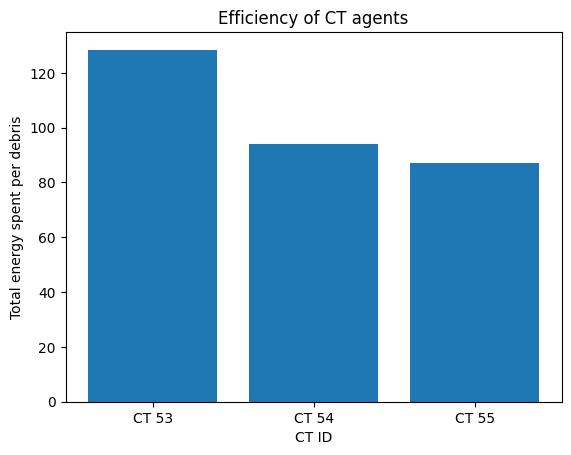

In [80]:
data = m_df["CT_efficiency"].iloc[-1]
print(data)

ids = [("CT " + str(x[0])) for x in data]
energy_efficiency = [x[1]/x[2] for x in data]
print(energy_efficiency)

pl.bar(x = ids, height = energy_efficiency)
pl.xlabel("CT ID")
pl.ylabel("Total energy spent per debris")
pl.title("Efficiency of CT agents")